In [209]:
# import pandas as pd

# # Read the CSV file
# df_URGS = pd.read_csv("test.csv")

# # Option 1: Select columns by index (0-indexed: 0 for column 1, 1 for column 2, 4 for column 5)
# selected_columns = df_URGS.iloc[:, [0, 1, 4]]

# # Option 2: If your CSV file has headers like 'ID', 'Age', and 'Score', you can select by column names:
# # selected_columns = df_URGS[['ID', 'Age', 'Score']]

# # Write the selected columns to a new CSV file
# selected_columns.to_csv("new_test.csv", index=False)

# print("New CSV file created with columns 1, 2, and 5.")


In [210]:
# # Read the CSV file
# df_URGS = pd.read_csv("full_dataset.csv")

# # Option 1: Select columns by index (0-indexed: 0 for column 1, 1 for column 2, 4 for column 5)
# selected_columns = df_URGS.iloc[:, [1, 4, 7, 11, 12, 13, 18]]

# # Write the selected columns to a new CSV file
# selected_columns.to_csv("final_dataset.csv", index=False)

# print("New CSV file created with columns needed for analysis.")


C:\Users\andrew.dilley\AppData\Local\Temp\ipykernel_75428\1959938982.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_URGS = pd.read_csv('final_dataset.csv', parse_dates=['Submission Date'])


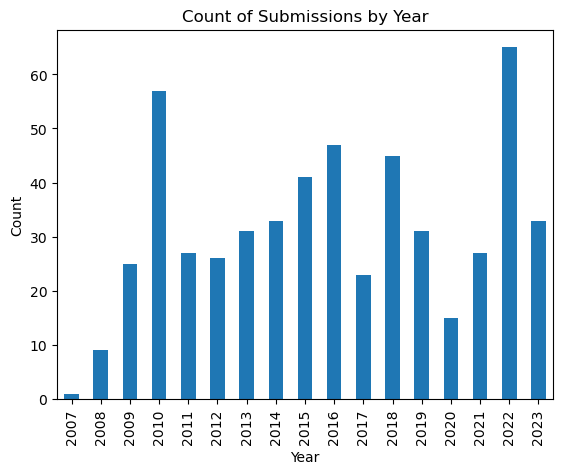

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file. Adjust the filename/path as needed.
df_URGS = pd.read_csv('final_dataset.csv', parse_dates=['Submission Date'])

# Alternatively, if parse_dates doesn't work properly, you can explicitly convert the column:
# df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'], format='%m/%d/%Y') 

# Extract the year from the 'Submission Date' column and store it in a new column
df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Group by year and count the total rows
year_counts = df_URGS.groupby('Year').size()

# Plot the counts as a bar chart
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Submissions by Year')

# Display the plot
plt.show()

# (Optional) Save the figure
# plt.savefig('submission_counts_by_year.png')


In [212]:
df_URGS.describe()

,Submission Date,Total Owing,Year
count,536,536.000000,536.000000
mean,2016-06-06 07:42:05.373134336,710.591194,2015.972015
min,2007-09-25 00:00:00,0.000000,2007.000000
25%,2012-08-06 00:00:00,355.582500,2012.000000
50%,2016-04-24 00:00:00,530.440000,2016.000000
75%,2020-03-14 18:00:00,834.252500,2020.000000
max,2023-10-27 00:00:00,6908.500000,2023.000000
std,NaN,649.014144,4.499342


In [213]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  536 non-null    datetime64[ns]
 1   Account No       535 non-null    object        
 2   Suburb           536 non-null    object        
 3   Status           536 non-null    object        
 4   Submitted        536 non-null    object        
 5   Received         536 non-null    object        
 6   Total Owing      536 non-null    float64       
 7   Year             536 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 31.5+ KB


In [214]:
df_URGS['Account No'] = df_URGS['Account No'].astype('string')


In [215]:
df_URGS['Account No'] = df_URGS['Account No'].astype(str).str.strip()

In [216]:
df_URGS['Account No'] = df_URGS['Account No'].apply(lambda x: x + '01' if len(x) == 10 else x)


In [217]:
df_URGS['Account No'] = df_URGS['Account No'].apply(lambda x: "0" + x if len(x) == 11 else x)


In [218]:
df_URGS['Account No'] = df_URGS['Account No'].astype('string')


In [219]:
print(df_URGS['Account No'].head())


0    9330140850015
1     933360205001
2     933073575007
3     933270260001
4     933380010003
Name: Account No, dtype: string


In [220]:
# Step 1: Ensure all values are strings and strip leading/trailing spaces
df_URGS['Account No'] = df_URGS['Account No'].astype(str).str.strip()


df_URGS['Account No'] = df_URGS['Account No'].apply(
    lambda x: x[:2] + '-' + x[2:6] + '-' + x[6:10] + '-' + x[10:] if len(x) == 12 else x
)


# Optionally, preview the result
print(df_URGS['Account No'].head())


0      9330140850015
1    93-3360-2050-01
2    93-3073-5750-07
3    93-3270-2600-01
4    93-3380-0100-03
Name: Account No, dtype: object


In [221]:
df_URGS['Account No'] = df_URGS['Account No'].astype('string')


In [222]:
df_URGS['Account No'] = df_URGS['Account No'].str.strip()

In [223]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Submission Date  536 non-null    datetime64[ns]
 1   Account No       536 non-null    string        
 2   Suburb           536 non-null    object        
 3   Status           536 non-null    object        
 4   Submitted        536 non-null    object        
 5   Received         536 non-null    object        
 6   Total Owing      536 non-null    float64       
 7   Year             536 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(4), string(1)
memory usage: 31.5+ KB


In [224]:
# Ensure the Account No column is treated as a string
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Count the lengths using boolean masks
count_14 = (df_URGS['Account No'].str.len() == 14).sum()
count_15 = (df_URGS['Account No'].str.len() == 15).sum()
count_16 = (df_URGS['Account No'].str.len() == 16).sum()

print("Number of Account No values with 14 characters:", count_14)
print("Number of Account No values with 15 characters:", count_15)
print("Number of Account No values with 16 characters:", count_16)


Number of Account No values with 14 characters: 0
Number of Account No values with 15 characters: 519
Number of Account No values with 16 characters: 0


In [225]:
# Ensure "Account No" is a string (if not already)
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Create a new column that calculates the length of each account number
df_URGS['Account No Length'] = df_URGS['Account No'].str.len()

# Filter account numbers that are not 15 characters long and select both relevant columns
invalid_accounts = df_URGS.loc[df_URGS['Account No Length'] != 15, ['Account No', 'Account No Length']]

# Print the result
print("Account numbers that are not 15 characters long and their lengths:")
print(invalid_accounts)


Account numbers that are not 15 characters long and their lengths:
        Account No  Account No Length
0    9330140850015                 13
38   93335003 5010                 13
93   933367    615                 13
146             93                  2
162  9332480700001                 13
182  9331182150017                 13
183  9330341000022                 13
199  9333101100040                 13
283  9330461050013                 13
311  9333100550047                 13
329  9332371100045                 13
343  9331000600029                 13
345  9331000600029                 13
357  9331303340001                 13
494  9330632400014                 13
497  9331762500011                 13
506           <NA>                  4


In [226]:
# Ensure the Account No column is treated as a string
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Get the length of each Account No string
lengths = df_URGS['Account No'].str.len()

# Calculate the minimum and maximum length
min_length = lengths.min()
max_length = lengths.max()

print("Minimum length of Account No:", min_length)
print("Maximum length of Account No:", max_length)


Minimum length of Account No: 2
Maximum length of Account No: 15


In [227]:
# Ensure "Account No" is treated as a string
df_URGS['Account No'] = df_URGS['Account No'].astype(str)

# Sort the account numbers by their length using a lambda function as the key
sorted_accounts = df_URGS['Account No'].sort_values(key=lambda x: x.str.len())

# Print the sorted account numbers
print(sorted_accounts)


146                 93
506               <NA>
0        9330140850015
494      9330632400014
311      9333100550047
            ...       
172    93-3271-0350-01
171    93-3064-1300-06
170    93-3100-0500-07
186    93-3061-1200-01
535    93-3334-0300-05
Name: Account No, Length: 536, dtype: object


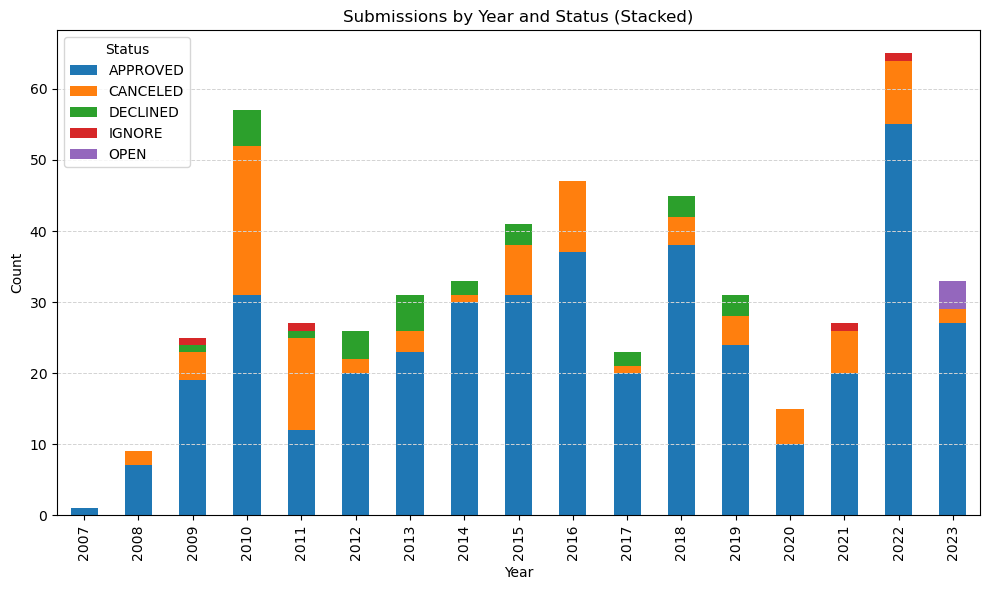

In [228]:

# Extract the year from "Submission Date"
df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Group by 'Year' and 'Status', then count the occurrences
group_counts = df_URGS.groupby(['Year', 'Status']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Submissions by Year and Status (Stacked)')
plt.legend(title='Status')

plt.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.7)


# Display the plot
plt.tight_layout()
plt.show()


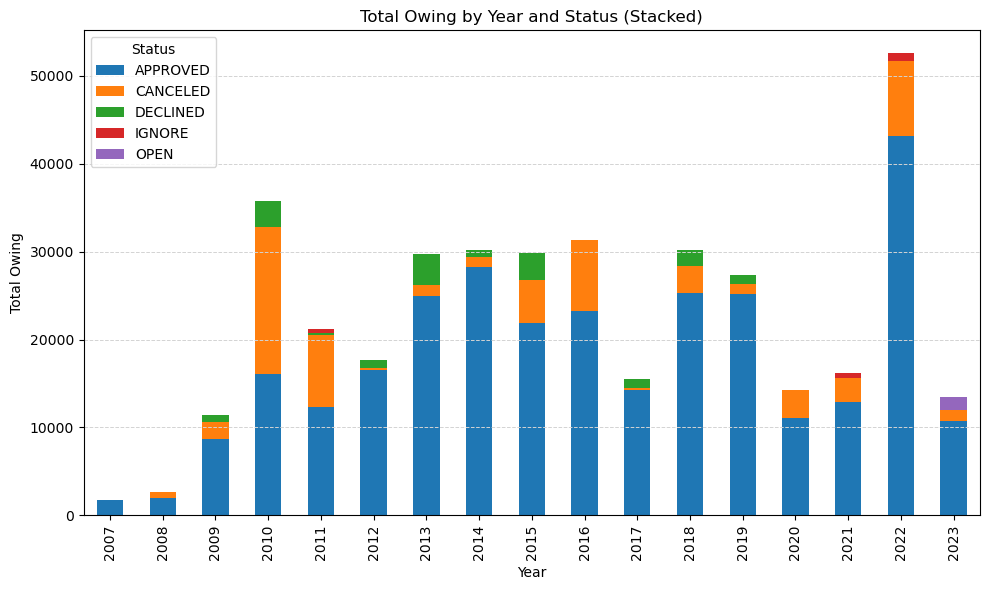

In [229]:
# Extract the year from "Submission Date"
df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Group by 'Year' and 'Status' and sum the "Total Owing" for each group
total_owing_by_group = df_URGS.groupby(['Year', 'Status'])['Total Owing'].sum().unstack(fill_value=0)

# Plot the totals as a stacked bar chart
ax = total_owing_by_group.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Total Owing')
ax.set_title('Total Owing by Year and Status (Stacked)')

# Add light grey horizontal gridlines
ax.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.7)

plt.legend(title='Status')
plt.tight_layout()
plt.show()


In [230]:
columns_index = df_URGS.columns
print("Columns (Index):", columns_index)


Columns (Index): Index(['Submission Date', 'Account No', 'Suburb', 'Status', 'Submitted',
       'Received', 'Total Owing', 'Year', 'Account No Length'],
      dtype='object')


In [231]:
# Count occurrences of each 'Account No'
account_counts = df_URGS['Account No'].value_counts()

# Filter to only include accounts with more than one submission
multiple_subs = account_counts[account_counts > 1]

print("Account numbers with multiple submissions:")
print(multiple_subs)


Account numbers with multiple submissions:
Account No
93-3198-0100-01    6
93-3045-1250-01    5
93-3279-0600-02    5
93-3034-7550-01    5
93-3360-2050-01    4
                  ..
93-3355-0900-01    2
93-3185-0400-01    2
93-3363-1300-01    2
93-3130-1020-01    2
93-3364-1800-01    2
Name: count, Length: 81, dtype: int64


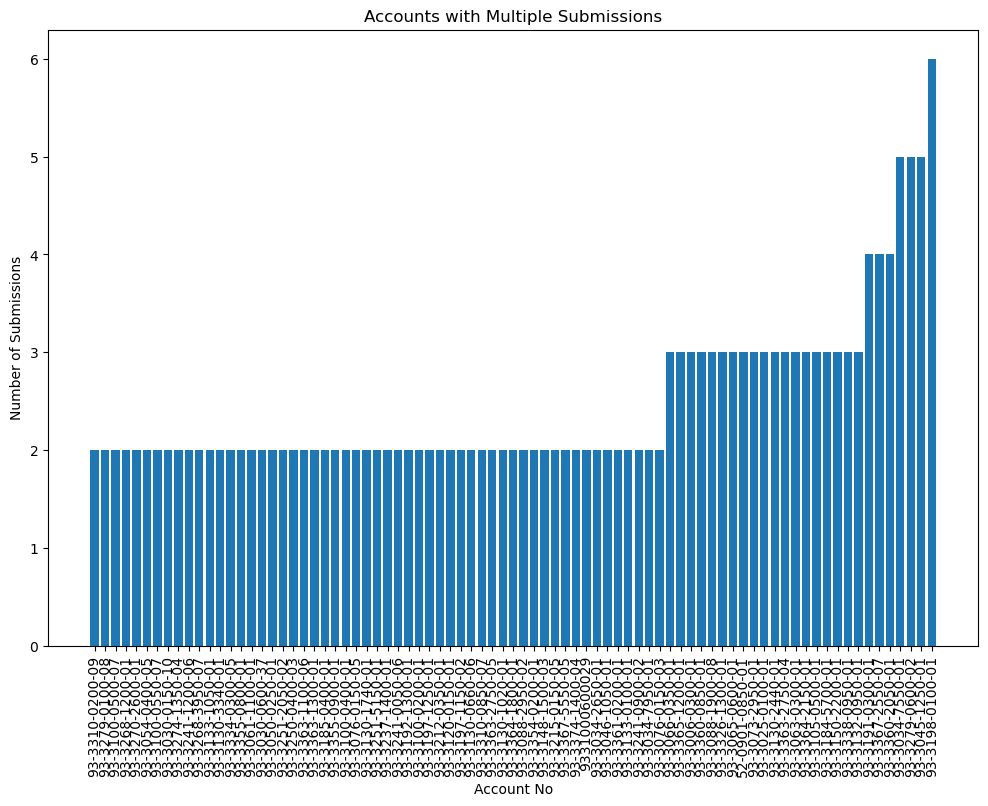

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_URGS is your DataFrame
# Count the submissions per 'Account No'
account_counts = df_URGS['Account No'].value_counts()

# Filter to accounts with multiple submissions
multiple_subs = account_counts[account_counts > 1]

# Sort the counts in ascending order
multiple_subs = multiple_subs.sort_values()

# Set up the plot
plt.figure(figsize=(12, 8))
plt.bar(multiple_subs.index, multiple_subs.values)

plt.xlabel('Account No')
plt.ylabel('Number of Submissions')
plt.title('Accounts with Multiple Submissions')
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long

plt.show()


In [233]:


# Step 1: Count submissions per account.
account_submissions = df_URGS['Account No'].value_counts()
# account_submissions is a Series: e.g., A001: 2, A002: 2, A003: 1

# Step 2: Create a frequency table: how many accounts have 1 submission, 2 submissions, etc.
submission_summary = account_submissions.value_counts().sort_index()
# submission_summary is a Series where the index is the submission count,
# and the value is the number of accounts with that count.

# Step 3: Calculate the total number of unique accounts.
total_accounts = account_submissions.shape[0]

# Use rename_axis to name the index and reset_index with the 'name' parameter
summary_df = submission_summary.rename_axis('Submission Count').reset_index(name='Number of Accounts')

# Step 4: Calculate the percentage for each submission count.
summary_df['Percentage'] = (summary_df['Number of Accounts'] / total_accounts) * 100

print("Submission Summary:")
print(summary_df)


Submission Summary:
   Submission Count  Number of Accounts  Percentage
0                 1                 336   80.575540
1                 2                  55   13.189448
2                 3                  19    4.556355
3                 4                   3    0.719424
4                 5                   3    0.719424
5                 6                   1    0.239808


In [234]:

# Step 1: Find accounts with multiple submissions
account_counts = df_URGS['Account No'].value_counts()
accounts_multiple = account_counts[account_counts > 1].index

# Filter the DataFrame to only include these accounts
df_multi = df_URGS[df_URGS['Account No'].isin(accounts_multiple)]

# Step 2: For each account, count the number of unique years of submission
unique_years = df_multi.groupby('Account No')['Year'].nunique().rename("Unique Year Count")

# Combine the submission count with the unique year count in a summary table
submission_summary = account_counts.loc[accounts_multiple].rename("Submission Count").to_frame()
submission_summary = submission_summary.join(unique_years)

# Step 3: Add a flag to indicate if the multiple submissions occurred in different years
submission_summary['Different Years'] = submission_summary['Unique Year Count'] == submission_summary['Submission Count']


print("Submission Summary for Accounts with Multiple Submissions:")
print(submission_summary)


Submission Summary for Accounts with Multiple Submissions:
                 Submission Count  Unique Year Count  Different Years
Account No                                                           
93-3198-0100-01                 6                  3            False
93-3045-1250-01                 5                  3            False
93-3279-0600-02                 5                  4            False
93-3034-7550-01                 5                  4            False
93-3360-2050-01                 4                  3            False
...                           ...                ...              ...
93-3355-0900-01                 2                  2             True
93-3185-0400-01                 2                  1            False
93-3363-1300-01                 2                  2             True
93-3130-1020-01                 2                  2             True
93-3364-1800-01                 2                  2             True

[81 rows x 3 columns]


In [235]:
# Filter the DataFrame for account '933198010001'
filtered_df = df_URGS[df_URGS['Account No'] == '933198010001'].copy()

# Convert the 'Submission Date' column to datetime
filtered_df['Submission Date'] = pd.to_datetime(filtered_df['Submission Date'])

# Sort the DataFrame by 'Submission Date'
sorted_df = filtered_df.sort_values(by='Submission Date')

print("Sorted submission dates for account 933198010001:")
print(sorted_df['Submission Date'].to_string(index=False))

Sorted submission dates for account 933198010001:
Series([], )


In [236]:


# If your DataFrame does not already have a 'Year' column, you can extract it like so:
# df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'])
# df_URGS['Year'] = df_URGS['Submission Date'].dt.year

# Step 1: Group by 'Account No' and 'Year' and count submissions for each combination.
grouped = df_URGS.groupby(['Account No', 'Year']).size().reset_index(name='Submission Count')

# Step 2: For each group (account-year), consider submissions beyond the first as duplicates.
# For example, if an account submitted 3 times in a year, then duplicate submissions = 3 - 1 = 2.
grouped['Duplicate Submissions'] = grouped['Submission Count'].apply(lambda count: count - 1 if count > 1 else 0)

# Step 3: Group by 'Year' to calculate the total duplicate submissions per year.
yearly_duplicates = grouped.groupby('Year')['Duplicate Submissions'].sum().reset_index()

print("Total multiple (duplicate) submissions per year:")
print(yearly_duplicates)


Total multiple (duplicate) submissions per year:
    Year  Duplicate Submissions
0   2007                      0
1   2008                      0
2   2009                      0
3   2010                      2
4   2011                      2
5   2012                      0
6   2013                      2
7   2014                      0
8   2015                      0
9   2016                      0
10  2017                      0
11  2018                      1
12  2019                      3
13  2020                      2
14  2021                      2
15  2022                     14
16  2023                      6


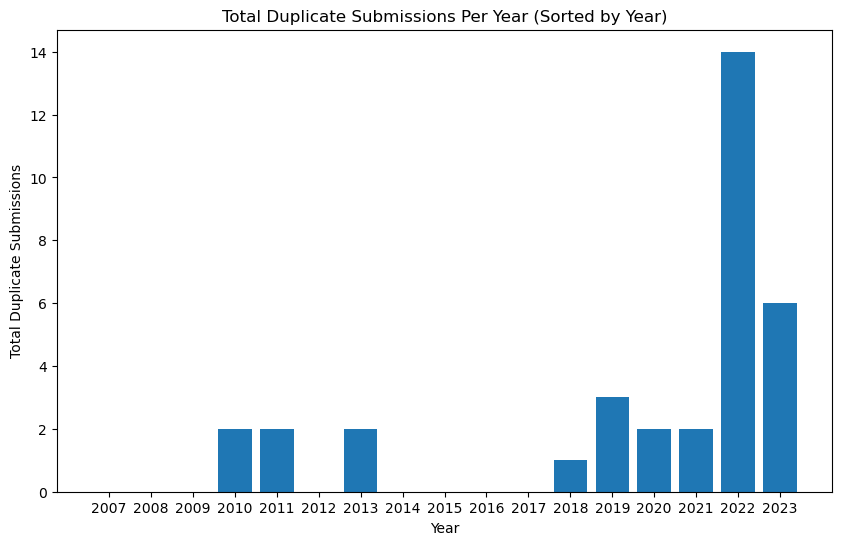

In [237]:
# Ensure 'Submission Date' is in datetime format (if needed)
df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'])

# Step 1: Group by 'Account No' and 'Year' to get submission counts per account per year.
grouped = df_URGS.groupby(['Account No', 'Year']).size().reset_index(name='Submission Count')

# Step 2: For each account-year group, calculate duplicate submissions (each submission beyond the first is considered a duplicate).
grouped['Duplicate Submissions'] = grouped['Submission Count'].apply(lambda count: count - 1 if count > 1 else 0)

# Step 3: Group by 'Year' to get total duplicate submissions per year.
yearly_duplicates = grouped.groupby('Year')['Duplicate Submissions'].sum().reset_index()

# Step 4: Sort the DataFrame by 'Year'
yearly_duplicates_sorted = yearly_duplicates.sort_values(by='Year')

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_duplicates_sorted['Year'].astype(str), yearly_duplicates_sorted['Duplicate Submissions'])
plt.xlabel("Year")
plt.ylabel("Total Duplicate Submissions")
plt.title("Total Duplicate Submissions Per Year (Sorted by Year)")
plt.show()


In [238]:
df_hardship_aging = pd.read_csv('Hardship Aging Debt.csv')


In [239]:
columns_index = df_hardship_aging.columns
print("Columns (Index):", columns_index)


Columns (Index): Index(['Month', 'Year', 'Property No', 'Property Address / Sundry Debtor',
       'Account No', 'Invoice Class', 'Pay Arr. Type', '30 Days', '60 Days',
       '90 Days', '120 Days', '120 + Days', '365 Days', '365 + Days'],
      dtype='object')


In [240]:
# Convert the 'Account No' column to a string and strip whitespace
df_hardship_aging['Account No'] = df_hardship_aging['Account No'].astype(str).str.strip()

# Create a new column for the length of each account number
df_hardship_aging['Length'] = df_hardship_aging['Account No'].str.len()

# Group by the length column and count the number of occurrences of each length, then sort by length
length_table = (
    df_hardship_aging.groupby('Length')['Account No']
    .count()
    .reset_index(name='Count')
    .sort_values('Length')
)

# Display the table
print(length_table)


   Length  Count
0      15   1425


In [241]:
df_hardship_aging.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             1425 non-null   object
 1   Year                              1425 non-null   object
 2   Property No                       1425 non-null   object
 3   Property Address / Sundry Debtor  1425 non-null   object
 4   Account No                        1425 non-null   object
 5   Invoice Class                     1425 non-null   object
 6   Pay Arr. Type                     1425 non-null   object
 7   30 Days                           1425 non-null   object
 8   60 Days                           1425 non-null   object
 9   90 Days                           1425 non-null   object
 10  120 Days                          1425 non-null   object
 11  120 + Days                        1425 non-null   object
 12  365 Days            

In [242]:
sample_accounts = df_hardship_aging['Account No'].sample(10, random_state=42)
print(sample_accounts)


628     52-0066-2300-01
680     52-0357-0050-05
1085    92-3298-3750-01
578     36-0971-1350-01
1010    52-1428-1050-01
759     52-0537-0350-01
931     52-1073-2250-05
727     52-0399-2650-03
70      02-4343-0200-01
123     04-4146-0800-04
Name: Account No, dtype: object


In [243]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Submission Date    536 non-null    datetime64[ns]
 1   Account No         536 non-null    object        
 2   Suburb             536 non-null    object        
 3   Status             536 non-null    object        
 4   Submitted          536 non-null    object        
 5   Received           536 non-null    object        
 6   Total Owing        536 non-null    float64       
 7   Year               536 non-null    int32         
 8   Account No Length  536 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 35.7+ KB


In [244]:
sample_accounts = df_URGS['Account No'].sample(10, random_state=42)
print(sample_accounts)


117    93-3367-2550-07
132    93-3374-1200-06
154    93-3144-0750-01
245    93-3360-2050-01
84     93-3061-0700-01
346    93-3364-1600-01
6      93-3149-2300-01
478    93-3300-0200-01
182      9331182150017
55     93-3241-0650-02
Name: Account No, dtype: object


In [245]:
sample_accounts = df_hardship_aging['Month'].sample(10, random_state=42)
print(sample_accounts)


628      May
680      Oct
1085     May
578      Apr
1010     Nov
759      Jan
931      Aug
727      Feb
70      June
123      Apr
Name: Month, dtype: object


In [246]:
sample_accounts = df_hardship_aging['Year'].sample(10, random_state=42)
print(sample_accounts)


628     2023-24
680     2024-25
1085    2023-24
578     2023-24
1010    2023-24
759     2023-24
931     2023-24
727     2023-24
70      2023-24
123     2023-24
Name: Year, dtype: object


In [247]:
# Create a mapping dictionary
month_mapping = {
    'Jan': 1, 'January': 1,
    'Feb': 2, 'February': 2,
    'Mar': 3, 'March': 3,
    'Apr': 4, 'April': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7, 'July': 7,
    'Aug': 8, 'August': 8,
    'Sep': 9, 'Sept': 9, 'September': 9,
    'Oct': 10, 'October': 10,
    'Nov': 11, 'November': 11,
    'Dec': 12, 'December': 12
}

# Map the month names in the 'Month' column to their numerical values and create a new column 'Month_num'
df_hardship_aging['Month_num'] = df_hardship_aging['Month'].map(month_mapping)

# Optionally, view the results
print(df_hardship_aging[['Month', 'Month_num']].head(10))


  Month  Month_num
0  July          7
1   Aug          8
2  Sept          9
3   Oct         10
4   Nov         11
5   Jan          1
6  July          7
7   Aug          8
8  Sept          9
9   Oct         10


In [248]:
import pandas as pd

# Example helper function to compute the calendar year
def compute_calendar_year(row):
    # Extract academic year parts: for "2023-24", start_year will be 2023
    year_str = row['Year']
    start_year = int(year_str.split('-')[0])
    end_year = start_year + 1  # academic year spans one year
    
    # Extract the month from the 'Month' column
    month = row['Month'].strip()  # use strip() in case of extra spaces
    
    # Define months that belong to the later calendar year (Jan to Jun)
    months_jan_to_jun = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June']
    
    # Return the corresponding calendar year based on the month
    if month in months_jan_to_jun:
        return end_year
    else:
        return start_year

# Apply the helper function to each row of the DataFrame
df_hardship_aging['Calendar_Year'] = df_hardship_aging.apply(compute_calendar_year, axis=1)

# Optionally, inspect the result
print(df_hardship_aging[['Year', 'Month', 'Calendar_Year']].head(10))


      Year Month  Calendar_Year
0  2023-24  July           2023
1  2023-24   Aug           2023
2  2023-24  Sept           2023
3  2023-24   Oct           2023
4  2023-24   Nov           2023
5  2023-24   Jan           2024
6  2023-24  July           2023
7  2023-24   Aug           2023
8  2023-24  Sept           2023
9  2023-24   Oct           2023


In [249]:
# List of debt columns to be summed
debt_columns = ["30 Days", "60 Days", "90 Days", "120 Days", "120 + Days", "365 Days", "365 + Days"]

# Clean and convert each debt column to numeric.
for col in debt_columns:
    # Remove any characters except digits and the decimal point, then convert to numeric.
    df_hardship_aging[col] = pd.to_numeric(df_hardship_aging[col].replace(r'[^\d.]', '', regex=True), errors='coerce')

# Create the total_debt column as the sum across the cleaned columns.
df_hardship_aging['total_debt'] = df_hardship_aging[debt_columns].sum(axis=1)

# Optionally, inspect the first few rows to verify the results
print(df_hardship_aging[debt_columns + ['total_debt']].head())


   30 Days  60 Days  90 Days  120 Days  120 + Days  365 Days  365 + Days  \
0    41.79     0.00     0.00     37.18       18.19     18.19         0.0   
1     0.00    41.79     0.00      0.00       35.37     35.37         0.0   
2     0.00     0.00    27.16      0.00        0.00      0.00         0.0   
3    36.49     0.00     0.00      7.16        0.00      0.00         0.0   
4     0.00    33.65     0.00      0.00        0.00      0.00         0.0   

   total_debt  
0      115.35  
1      112.53  
2       27.16  
3       43.65  
4       33.65  


In [250]:
print(df_hardship_aging.describe())


           30 Days      60 Days      90 Days     120 Days    120 + Days  \
count  1425.000000  1425.000000  1425.000000  1425.000000   1425.000000   
mean     86.930947    80.408477    72.875895    68.426568    925.486393   
std     173.258109   212.589191   203.524560   200.086131   1581.247015   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000    355.640000   
75%     122.200000    70.370000    43.200000    27.120000   1011.170000   
max    1426.540000  5106.340000  4986.340000  4782.630000  16371.090000   

          365 Days    365 + Days  Length    Month_num  Calendar_Year  \
count  1425.000000   1425.000000  1425.0  1425.000000    1425.000000   
mean    388.381551    537.104842    15.0     6.940351    2023.662456   
std     599.429393   1272.982636     0.0     3.127435       0.473038   
min       0.000000      0.000000    

In [251]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Submission Date    536 non-null    datetime64[ns]
 1   Account No         536 non-null    object        
 2   Suburb             536 non-null    object        
 3   Status             536 non-null    object        
 4   Submitted          536 non-null    object        
 5   Received           536 non-null    object        
 6   Total Owing        536 non-null    float64       
 7   Year               536 non-null    int32         
 8   Account No Length  536 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 35.7+ KB


In [252]:
print(df_URGS.describe())

                     Submission Date  Total Owing         Year  \
count                            536   536.000000   536.000000   
mean   2016-06-06 07:42:05.373134336   710.591194  2015.972015   
min              2007-09-25 00:00:00     0.000000  2007.000000   
25%              2012-08-06 00:00:00   355.582500  2012.000000   
50%              2016-04-24 00:00:00   530.440000  2016.000000   
75%              2020-03-14 18:00:00   834.252500  2020.000000   
max              2023-10-27 00:00:00  6908.500000  2023.000000   
std                              NaN   649.014144     4.499342   

       Account No Length  
count         536.000000  
mean           14.899254  
min             2.000000  
25%            15.000000  
50%            15.000000  
75%            15.000000  
max            15.000000  
std             0.802519  


In [253]:
# Ensure 'Submission Date' is a datetime column. If it's not, convert it:
df_URGS['Submission Date'] = pd.to_datetime(df_URGS['Submission Date'], errors='coerce')

# Extract the month number and create a new column 'Month_num'
df_URGS['Month_num'] = df_URGS['Submission Date'].dt.month

# Optionally, inspect the results
print(df_URGS[['Submission Date', 'Month_num']].head())


  Submission Date  Month_num
0      2023-10-27         10
1      2023-10-27         10
2      2023-09-26          9
3      2023-09-11          9
4      2010-08-27          8


In [254]:
df_URGS.rename(columns={'Year': 'Calendar_year'}, inplace=True)

# Optionally, check the updated column names
print(df_URGS.columns)


Index(['Submission Date', 'Account No', 'Suburb', 'Status', 'Submitted',
       'Received', 'Total Owing', 'Calendar_year', 'Account No Length',
       'Month_num'],
      dtype='object')


In [255]:
print(df_URGS[['Submission Date', 'Month_num', 'Calendar_year']].head())


  Submission Date  Month_num  Calendar_year
0      2023-10-27         10           2023
1      2023-10-27         10           2023
2      2023-09-26          9           2023
3      2023-09-11          9           2023
4      2010-08-27          8           2010


In [256]:
# For df_hardship_aging:
df_hardship_aging['Account No'] = df_hardship_aging['Account No'].astype(str).str.strip()

# For df_URGS:
df_URGS['Account No'] = df_URGS['Account No'].astype(str).str.strip()


In [257]:
df_hardship_aging.rename(columns={'Calendar_Year': 'Calendar_year'}, inplace=True)
print(df_hardship_aging.columns)


Index(['Month', 'Year', 'Property No', 'Property Address / Sundry Debtor',
       'Account No', 'Invoice Class', 'Pay Arr. Type', '30 Days', '60 Days',
       '90 Days', '120 Days', '120 + Days', '365 Days', '365 + Days', 'Length',
       'Month_num', 'Calendar_year', 'total_debt'],
      dtype='object')


In [258]:
# For df_hardship_aging:
sorted_df_hardship = df_hardship_aging.sort_values(by=['Account No', 'Calendar_year', 'Month_num'])[['Account No', 'Calendar_year', 'Month_num']]
sorted_df_hardship.to_csv('df_hardship_aging_accounts.csv', index=False)

# For df_URGS:
sorted_df_URGS = df_URGS.sort_values(by=['Account No', 'Calendar_year', 'Month_num'])[['Account No', 'Calendar_year', 'Month_num']]
sorted_df_URGS.to_csv('df_URGS_accounts.csv', index=False)

# Optionally, print a confirmation message
print("CSV files exported with Account No, Calendar_year, and Month_num columns (sorted by these columns):")
print("df_hardship_aging_accounts.csv and df_URGS_accounts.csv")


CSV files exported with Account No, Calendar_year, and Month_num columns (sorted by these columns):
df_hardship_aging_accounts.csv and df_URGS_accounts.csv


In [259]:
# Step 1: Rename the Calendar_Year column in df_hardship_aging to match the URGS column name
df_hardship_aging.rename(columns={'Calendar_Year': 'Calendar_year'}, inplace=True)

# Step 2: Merge the two DataFrames on 'Account No', 'Month_num', and 'Calendar_year'
merged_df = pd.merge(
    df_URGS,
    df_hardship_aging[['Account No', 'Calendar_year', 'Month_num', 'total_debt']],
    on=['Account No','Calendar_year', 'Month_num'],
    how='left'
)

# Step 3: Rename the joined column to "Debt At Submission" in the merged DataFrame
merged_df.rename(columns={'total_debt': 'Debt At Submission'}, inplace=True)

# Optionally, if you want df_URGS to reflect this new column, assign merged_df back to df_URGS
df_URGS = merged_df

# Inspect the result
print(df_URGS.head())


  Submission Date       Account No    Suburb    Status Submitted Received  \
0      2023-10-27    9330140850015  PORTLAND      OPEN       Yes       No   
1      2023-10-27  93-3360-2050-01  PORTLAND      OPEN       Yes       No   
2      2023-09-26  93-3073-5750-07  PORTLAND  CANCELED        No       No   
3      2023-09-11  93-3270-2600-01  PORTLAND      OPEN        No       No   
4      2010-08-27  93-3380-0100-03  PORTLAND  APPROVED       Yes      Yes   

   Total Owing  Calendar_year  Account No Length  Month_num  \
0       287.25           2023                 13         10   
1       208.05           2023                 15         10   
2       614.47           2023                 15          9   
3       729.71           2023                 15          9   
4       232.32           2010                 15          8   

   Debt At Submission  
0                 NaN  
1                 NaN  
2               824.1  
3                 NaN  
4                 NaN  


In [260]:
nan_debt_count = df_URGS['Debt At Submission'].isna().sum()
print("Number of submissions with NaN Debt At Submission:", nan_debt_count)


Number of submissions with NaN Debt At Submission: 535


In [261]:
value_count = df_URGS['Debt At Submission'].notna().sum()
print("Number of submissions with a value for Debt At Submission:", value_count)


Number of submissions with a value for Debt At Submission: 1


In [262]:
df_URGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Submission Date     536 non-null    datetime64[ns]
 1   Account No          536 non-null    object        
 2   Suburb              536 non-null    object        
 3   Status              536 non-null    object        
 4   Submitted           536 non-null    object        
 5   Received            536 non-null    object        
 6   Total Owing         536 non-null    float64       
 7   Calendar_year       536 non-null    int32         
 8   Account No Length   536 non-null    int64         
 9   Month_num           536 non-null    int32         
 10  Debt At Submission  1 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 42.0+ KB


Number of records in each Debt At Submission category:
Debt Category
$1-$100        0
$101-$200      0
$201-$300      0
$301-$400      0
$401-$500      0
$501-$600      0
$601-$700      0
$701-$800      0
$801-$900      1
$901-$1000     0
$1001-$1100    0
$1101-$1200    0
$1201-$1300    0
$1301-$1400    0
$1401-$1500    0
$1501-$1600    0
$1601-$1700    0
$1701-$1800    0
$1801-$1900    0
$1901-$2000    0
$2001-$2100    0
$2101-$2200    0
$2201-$2300    0
$2301-$2400    0
$2401-$2500    0
$2501-$2600    0
$2601-$2700    0
$2701-$2800    0
$2801-$2900    0
$2901-$3000    0
>$3000         0
Name: count, dtype: int64


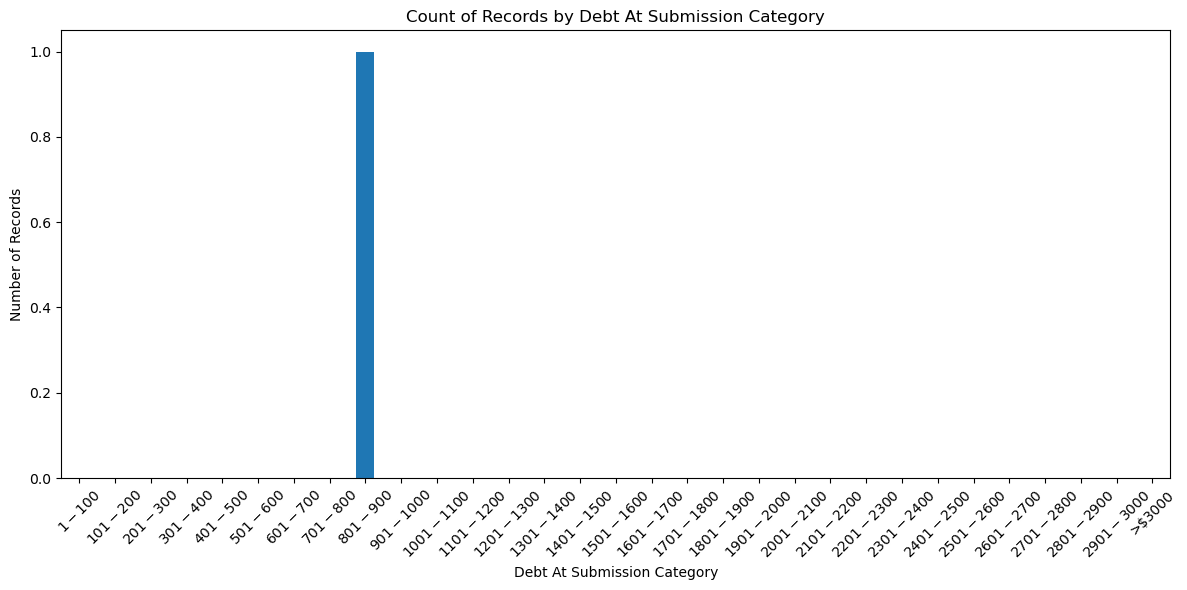

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define bins: we'll use 0 as the lower bound so that values greater than 0 fall into the first bin.
bins = list(range(0, 3100, 100)) + [np.inf]
# Create labels for bins: first bin labeled "$1-$100", next "$101-$200", etc.,
# and the final bin labeled ">$3000".
labels = [f"${bins[i-1]+1}-${bins[i]}" for i in range(1, len(bins)-1)]
labels.append(">$3000")

# Now classify 'Debt At Submission' into these bins (assume the column is numeric)
df_URGS['Debt Category'] = pd.cut(df_URGS['Debt At Submission'], bins=bins, labels=labels, right=True)

# Count the number of records in each debt category. Sorting by category order.
debt_counts = df_URGS['Debt Category'].value_counts().sort_index()

# Print the counts table
print("Number of records in each Debt At Submission category:")
print(debt_counts)

# Create a bar chart of the counts by debt category
plt.figure(figsize=(12, 6))
debt_counts.plot(kind='bar')
plt.xlabel("Debt At Submission Category")
plt.ylabel("Number of Records")
plt.title("Count of Records by Debt At Submission Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
